# CoastSeg
**Notebook**: SDS_coastsat_classifier

**Purpose**: This notebook contains an interactive mapping dashboard that can be used to download satellite imagery from Google Earth Engine(GEE). 

**How it  Works**: Draw a bounding box along the coastline then click **Generate ROI** which will create a series of Region of Interests(ROI) along the coastline. The map will check if there is a shoreline vector in the region where the bounding box was drawn then create a series of ROIs along the shoreline vector. Select a few ROIs on the map then click **Download Imagery**.

# Step 1: Connect Google Earth Engine
---
Read the following section if you don't know how to sign in with Google Earth Engine, otherwise skip to the next section **Authenticate with Google Earth Engine (GEE)**
</br>

## Tutorial for Signing in with Google Earth Engine (GEE)
---
### Steps:
1. Click the link that appears upon running **Step 3: Connect Google Earth Engine**
2. This link will open a separate tab where you be prompted to select an email to sign in with. Click the account you used to sign up with GEE.
3. Click the button 'Generate Token'
4. When the prompt says "Google Hasn't Verified this App" press 'continue'
5. Select both check boxes on the following prompt.
6. On the final page an 'Authorization Code' will be shown copy this code and exit. Copy this code into the box below *Step 3: Connect Google Earth Engine** then click 'enter' on your keyboard and you're done!

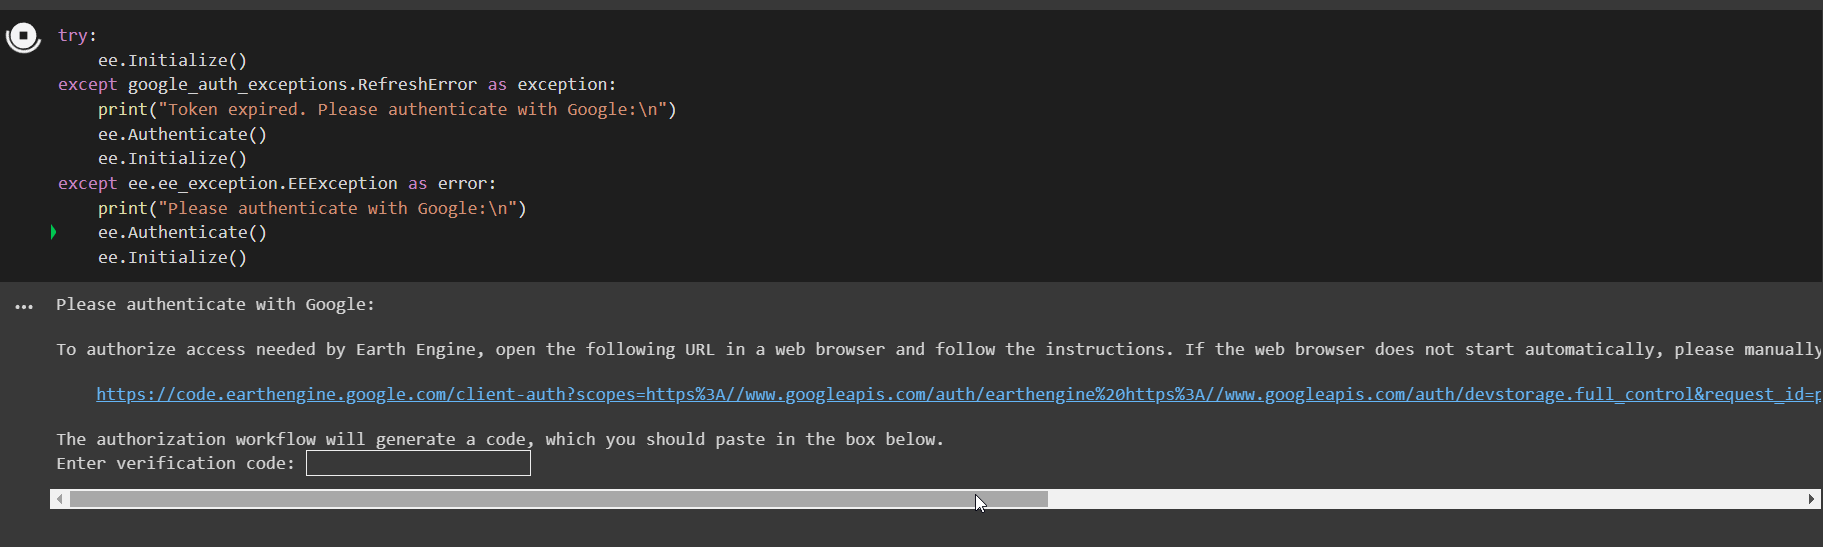

## Authenticate with Google Earth Engine (GEE)

- Run this cell to initialize GEE so you can download satellite imagery.

### First Time Users

- If you're a first time user you will need to sign up for a Google Earth Engine acoount in order to use GEE. **Sign up here:** https://signup.earthengine.google.com. This only needs to be done once and it takes a day to get your account verified.

### How GEE Authentication works

- In order to use GEE you will need an authorization token with is obtained by running the command  `ee.Initialize()` in this cell. This token should be good for a week or so before you need to generate a new token.



In [ ]:
import ee
from google.auth import exceptions as google_auth_exceptions

try:
    ee.Initialize()
except google_auth_exceptions.RefreshError as exception:
    print("Please authenticate with Google:\n")
    ee.Authenticate()
    ee.Initialize()

 # Step 2: Create CoastSeg Map Dashboard
 ---
 # How to Use the Map Dashboard

---
1.  Modify the setting then click `Save Settings` Button
2. Use the rectangle tool to draw a bounding box along the coastline.
3. Click `Generate ROI` to create Regions of Interest (ROI) rectangles along the coastline within the bounding box.
4. Load transects into your bounding box with the `Load Transects` button.
   - If any exist transects are exist within the bounding box on the map they will be loaded onto the map, however if none are found in the bounding box then none will load.
6. On the map click the ROIs you want to download.
7. Once you've selected all the ROIs you want to download click `Download Imagery`
   - Each downloaded ROI will have its own unique folder within the `data` directory.
8. To extract a timeseries of shorelines for the ROIs you downloaded click `Extract Shorelines`.
## Need More Help?
Check out the CoastSeg Wiki
https://github.com/Doodleverse/CoastSeg/wiki

In [ ]:
import os
# Local Imports
import coastseg
from coastseg import coastseg_map
from coastseg import coastseg_logs #must be the first module loaded to create logs folder

# External Imports
import ee
from google.auth import exceptions as google_auth_exceptions

# suppress tensorflow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from coastseg.map_UI import UI
coastsegmap=coastseg_map.CoastSeg_Map()
coastseg_ui = UI(coastsegmap)
coastseg_ui.create_dashboard()